In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch.nn as nn

In [4]:
X = torch.linspace(1,50,50).reshape(-1,1)
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [5]:
torch.manual_seed(71)
e = torch.randint(-8, 9, (50,1), dtype=torch.float)
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [7]:
y = 2*X+1+e
y.shape

torch.Size([50, 1])

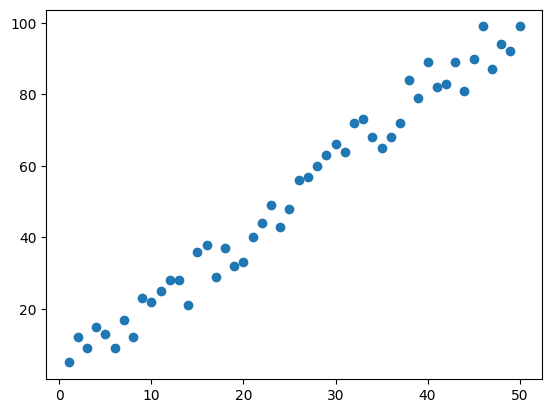

In [8]:
plt.scatter(X.numpy(), y.numpy())

In [10]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [18]:
class Model(nn.Module):

    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred


In [19]:
torch.manual_seed(59)

model = Model(1,1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [20]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [22]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<ViewBackward0>)


In [23]:
x1 = np.linspace(0.0, 50.0, 50)
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [24]:
w1 = 0.10597813129425049
b1 = 0.9637961387634277

y1 = w1*x1+b1
y1

array([0.96379614, 1.07193709, 1.18007804, 1.28821899, 1.39635994,
       1.50450089, 1.61264184, 1.72078279, 1.82892374, 1.93706469,
       2.04520564, 2.15334659, 2.26148754, 2.36962849, 2.47776944,
       2.58591039, 2.69405134, 2.80219229, 2.91033324, 3.01847419,
       3.12661514, 3.2347561 , 3.34289705, 3.451038  , 3.55917895,
       3.6673199 , 3.77546085, 3.8836018 , 3.99174275, 4.0998837 ,
       4.20802465, 4.3161656 , 4.42430655, 4.5324475 , 4.64058845,
       4.7487294 , 4.85687035, 4.9650113 , 5.07315225, 5.1812932 ,
       5.28943415, 5.3975751 , 5.50571605, 5.613857  , 5.72199795,
       5.8301389 , 5.93827985, 6.0464208 , 6.15456175, 6.2627027 ])

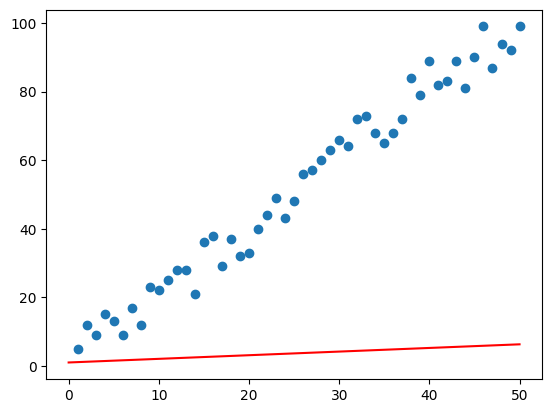

In [25]:
plt.scatter(X.numpy(), y.numpy())

plt.plot(x1, y1, 'r')

In [26]:
criteron = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [27]:
epochs = 50
losses = []
for i in range(epochs):
    i = i+1

    #Predicting on the forward pass
    y_pred = model.forward(X)

    #Calculte the loss
    loss = criteron(y_pred, y)

    #Record the error
    losses.append(loss)

    print(f"epoch {i} loss: {loss.item()} weight:{model.linear.weight.item()} bias:{model.linear.bias.item()}")

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

epoch 1 loss: 3057.216796875 weight:0.10597813129425049 bias:0.9637961387634277
epoch 2 loss: 1588.5306396484375 weight:3.334900140762329 bias:1.0604636669158936
epoch 3 loss: 830.30029296875 weight:1.014832615852356 bias:0.9922628402709961
epoch 4 loss: 438.8524169921875 weight:2.6817996501922607 bias:1.0425218343734741
epoch 5 loss: 236.7615203857422 weight:1.4840211868286133 bias:1.0076650381088257
epoch 6 loss: 132.4291229248047 weight:2.3446059226989746 bias:1.0339646339416504
epoch 7 loss: 78.56578826904297 weight:1.7262252569198608 bias:1.0163217782974243
epoch 8 loss: 50.75775909423828 weight:2.170504093170166 bias:1.0302516222000122
epoch 9 loss: 36.4012336730957 weight:1.8512457609176636 bias:1.0214954614639282
epoch 10 loss: 28.989229202270508 weight:2.0806007385253906 bias:1.029038906097412
epoch 11 loss: 25.162382125854492 weight:1.9157683849334717 bias:1.0248701572418213
epoch 12 loss: 23.186473846435547 weight:2.034165620803833 bias:1.0291162729263306
epoch 13 loss: 22.1

In [35]:
new_losses = []
for loss in losses:
    new_losses.append(loss.detach().numpy())
new_losses

[array(3057.2168, dtype=float32),
 array(1588.5306, dtype=float32),
 array(830.3003, dtype=float32),
 array(438.85242, dtype=float32),
 array(236.76152, dtype=float32),
 array(132.42912, dtype=float32),
 array(78.56579, dtype=float32),
 array(50.75776, dtype=float32),
 array(36.401234, dtype=float32),
 array(28.98923, dtype=float32),
 array(25.162382, dtype=float32),
 array(23.186474, dtype=float32),
 array(22.166126, dtype=float32),
 array(21.63911, dtype=float32),
 array(21.366772, dtype=float32),
 array(21.225918, dtype=float32),
 array(21.152946, dtype=float32),
 array(21.11501, dtype=float32),
 array(21.095177, dtype=float32),
 array(21.084684, dtype=float32),
 array(21.079014, dtype=float32),
 array(21.07583, dtype=float32),
 array(21.073938, dtype=float32),
 array(21.0727, dtype=float32),
 array(21.07182, dtype=float32),
 array(21.071106, dtype=float32),
 array(21.070486, dtype=float32),
 array(21.069914, dtype=float32),
 array(21.069368, dtype=float32),
 array(21.068838, dtype=

Text(0, 0.5, 'Epochs')

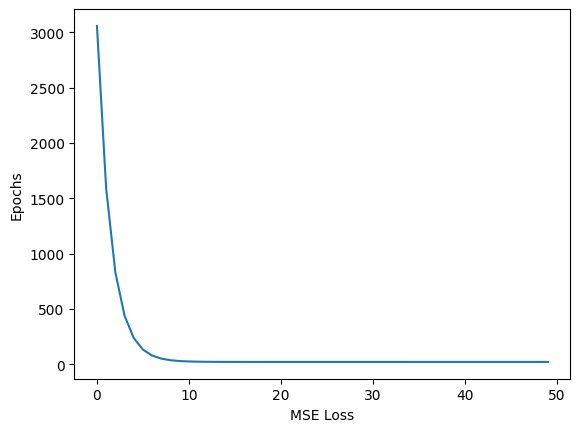

In [36]:
plt.plot(range(epochs), new_losses)
plt.xlabel('MSE Loss')
plt.ylabel('Epochs')

In [37]:
x = np.linspace(0.0, 50.0,50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()
predicted_y = current_weight*x+current_bias
predicted_y

array([  1.05575156,   3.08005679,   5.10436203,   7.12866726,
         9.15297249,  11.17727772,  13.20158295,  15.22588818,
        17.25019342,  19.27449865,  21.29880388,  23.32310911,
        25.34741434,  27.37171957,  29.39602481,  31.42033004,
        33.44463527,  35.4689405 ,  37.49324573,  39.51755096,
        41.5418562 ,  43.56616143,  45.59046666,  47.61477189,
        49.63907712,  51.66338236,  53.68768759,  55.71199282,
        57.73629805,  59.76060328,  61.78490851,  63.80921375,
        65.83351898,  67.85782421,  69.88212944,  71.90643467,
        73.9307399 ,  75.95504514,  77.97935037,  80.0036556 ,
        82.02796083,  84.05226606,  86.07657129,  88.10087653,
        90.12518176,  92.14948699,  94.17379222,  96.19809745,
        98.22240268, 100.24670792])

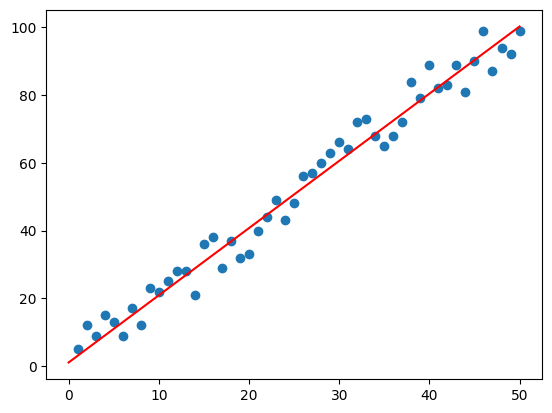

In [39]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x, predicted_y, 'r')